# Chapter 4 Correlating Spike Trains

* [original companion code and data](https://www.elsevier.com/books-and-journals/book-companion/9780128040430/chapter-files#Chapter%20Files)

In [68]:
import scipy.io
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
import scipy.stats as sc
numChannels = 96
noiseCodes = [0,255]
timeBase=np.arange(-.2,2.5,.01)
gratingOn = 0
gratingOff = 2

In [2]:
matIn = scipy.io.loadmat('./NDS Files for Download/arrayDATA.mat')

In [3]:
num_trials = len(matIn['DATA'])
print(num_trials)

2300


In [4]:
all_oris = [matIn['DATA'][trial][0][1][0][0] for trial in range(num_trials)]
ori = list(set(all_oris))
num_ori = len(ori)
print("number of orientations used in experiment:", num_ori)

number of orientations used in experiment: 2


In [5]:
trial_indices = defaultdict(list)

In [6]:
for trial in range(num_trials):
    for angle in ori:
        if all_oris[trial] == angle:
            trial_indices[angle].append(trial)

In [7]:
print('number of trials using 90 angle:', len(trial_indices[90.0]))
print('number of trials using 0 angle:', len(trial_indices[0.0]))

number of trials using 90 angle: 1150
number of trials using 0 angle: 1150


In [8]:
spike_times = [[[[] for channel in range(numChannels)] for angle in range(num_ori)] for trial in range(num_trials)]
# make 4D list, (trials, angles, channels, [])

In [9]:
for iter_n, angle in enumerate(ori):
    angle = int(angle)
    for trial in trial_indices[angle]:
        for channel in range(numChannels):
            spike_times[trial][iter_n][channel] = [spike[2] for spike in matIn['DATA'][trial][0][0] if (spike[0]==channel) and (spike[1] not in noiseCodes)]

In [10]:
linearizedSpikeTimes = defaultdict(lambda: defaultdict(list))

In [11]:
for trial in matIn['DATA']:
    stim_angle = trial[0][1][0][0]
    for spike in trial[0][0]:
        if spike[1] not in noiseCodes:
            channel = spike[0]
            spike_time = spike[2]
            linearizedSpikeTimes[channel][stim_angle].append(spike_time)

In [12]:
PSTHs = defaultdict(lambda: defaultdict(list))

In [13]:
for unitkey in linearizedSpikeTimes.keys():
    for angle in ori:
        PSTHs[unitkey][angle], bins = np.histogram(linearizedSpikeTimes[unitkey][angle], bins=timeBase)

/home/hyunsu/anaconda3/envs/neu_data/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


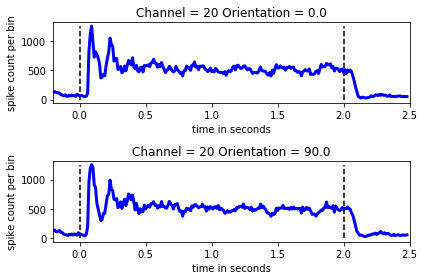

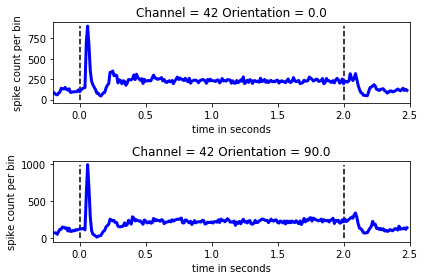

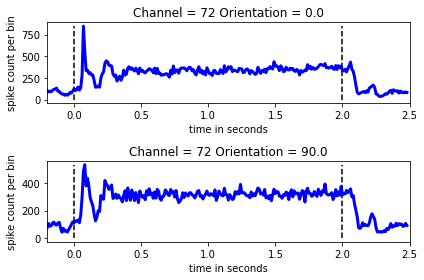

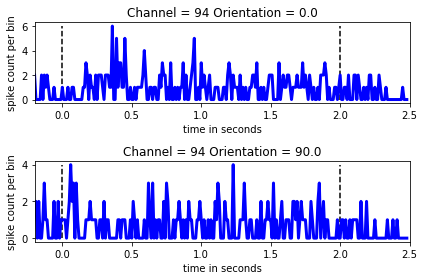

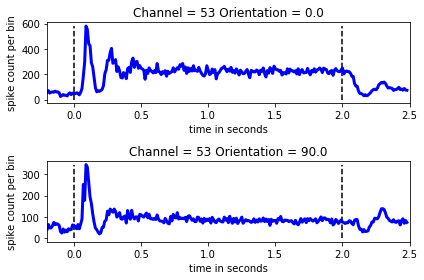

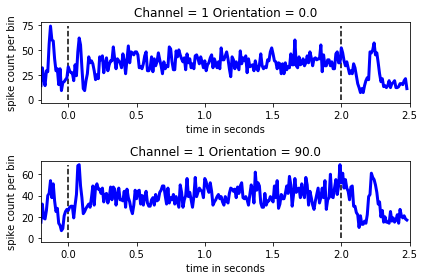

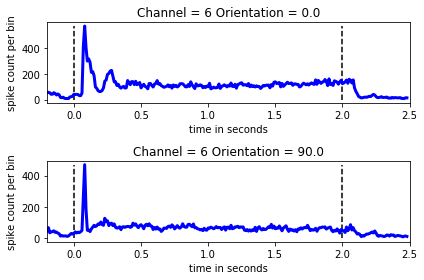

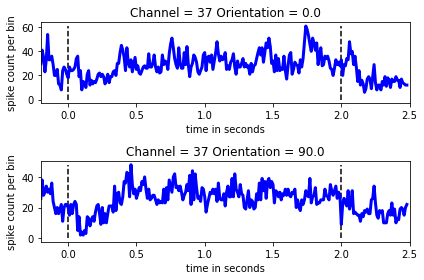

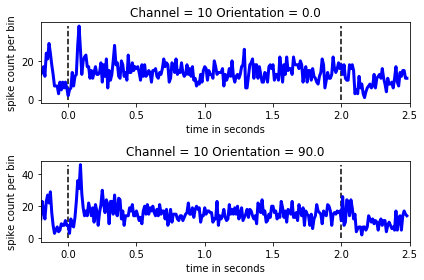

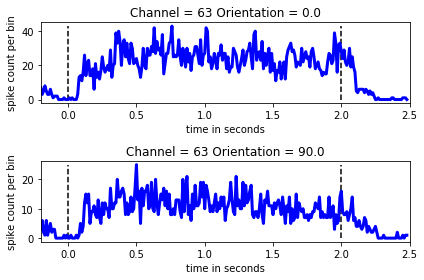

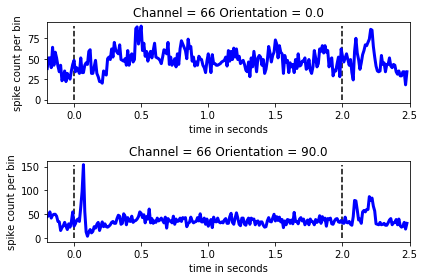

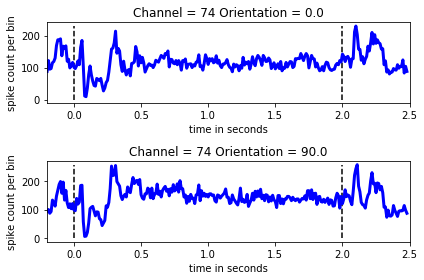

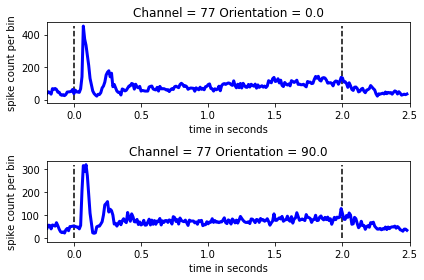

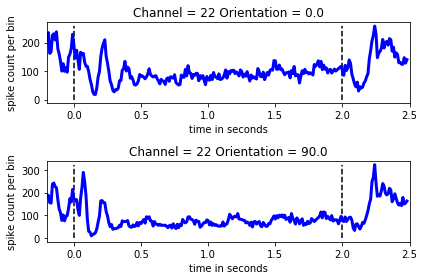

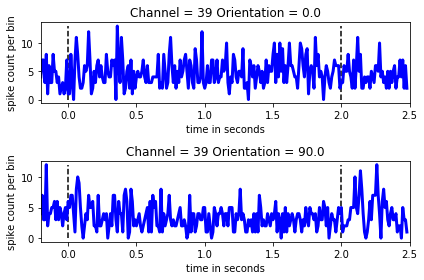

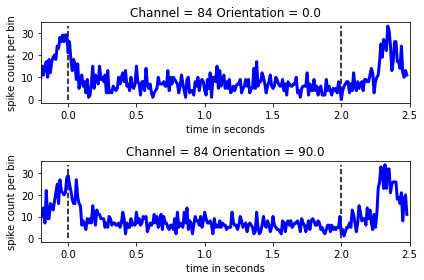

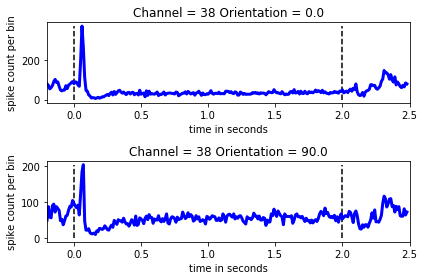

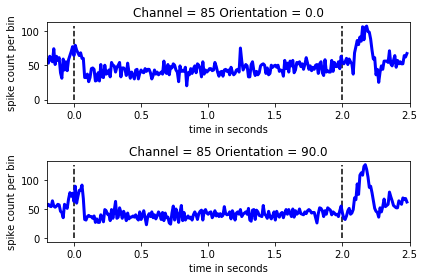

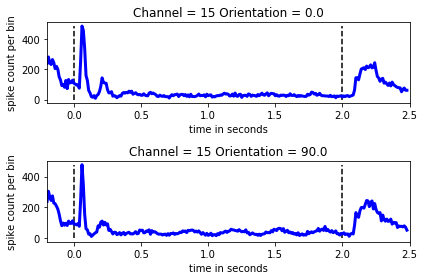

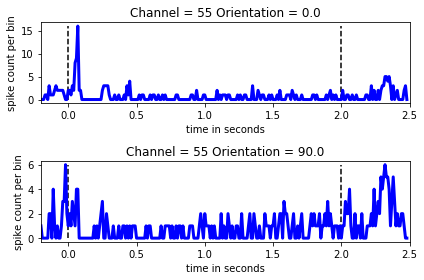

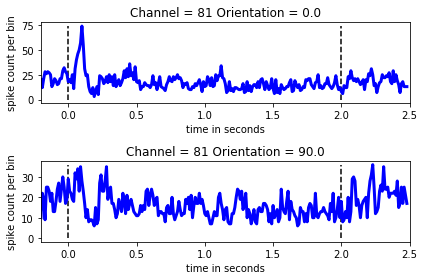

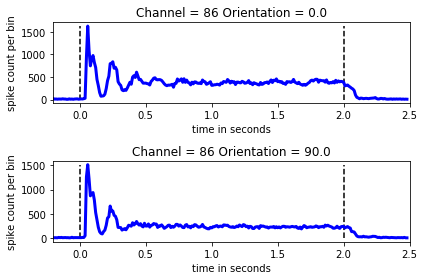

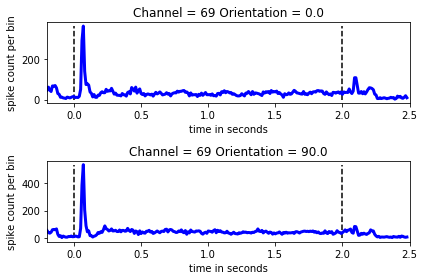

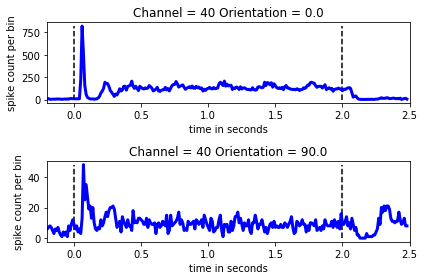

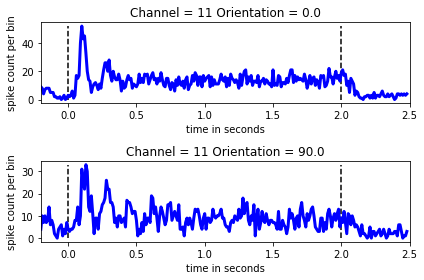

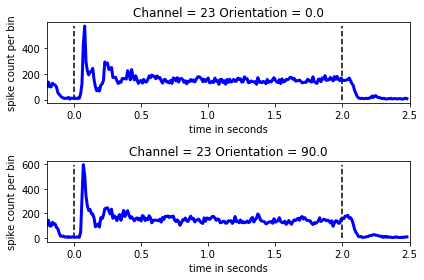

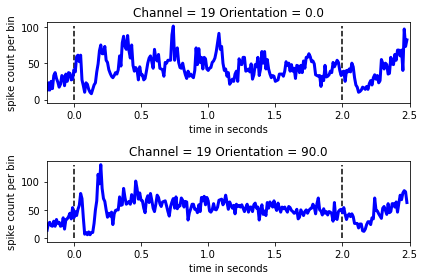

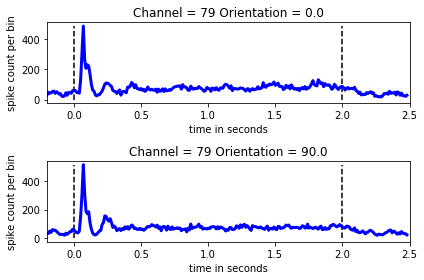

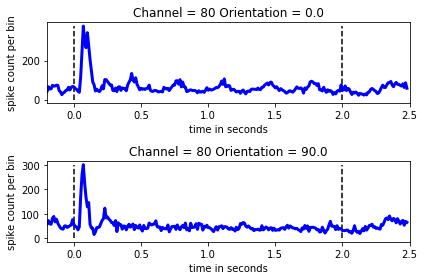

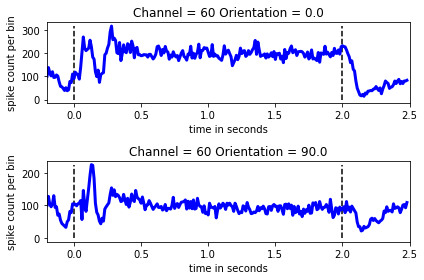

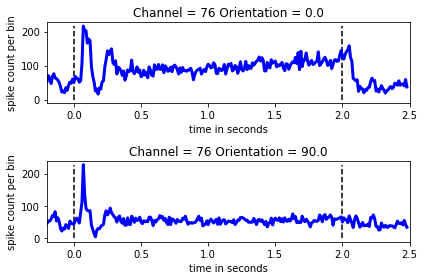

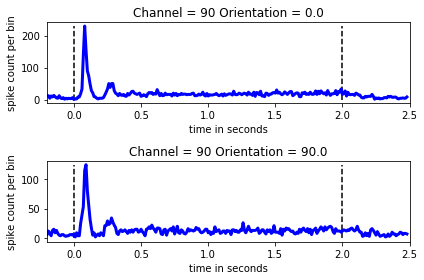

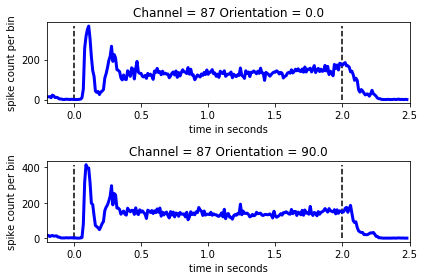

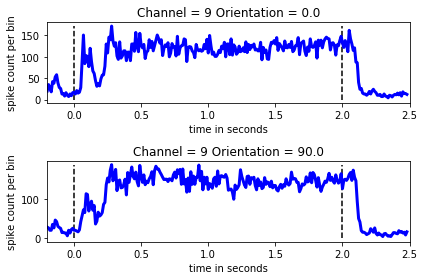

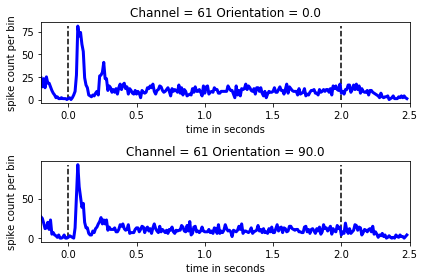

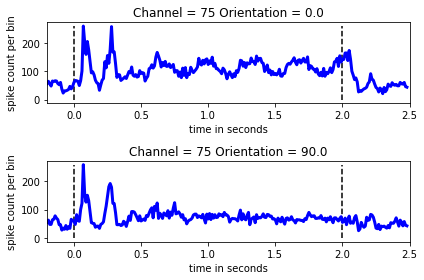

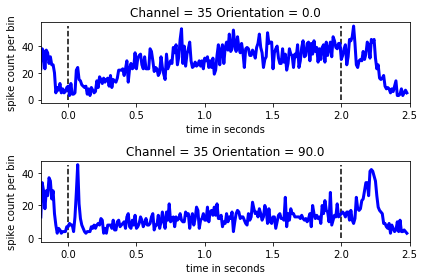

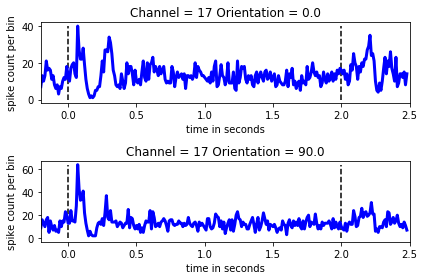

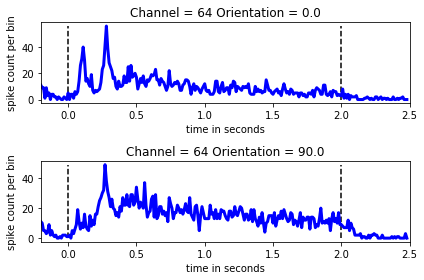

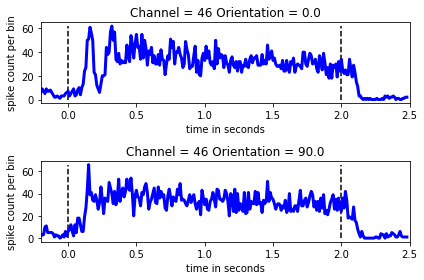

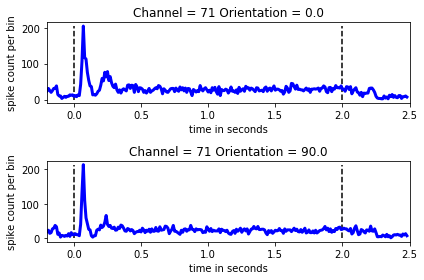

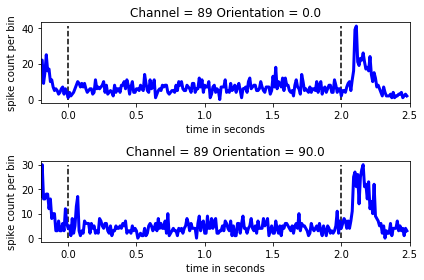

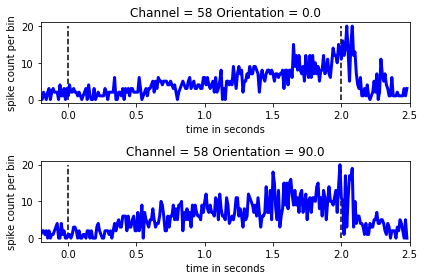

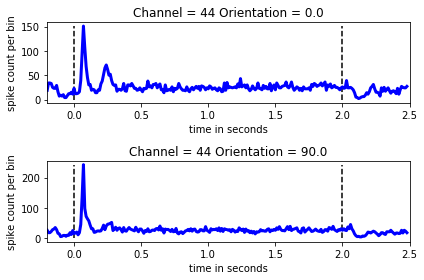

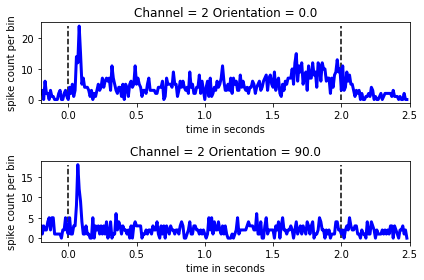

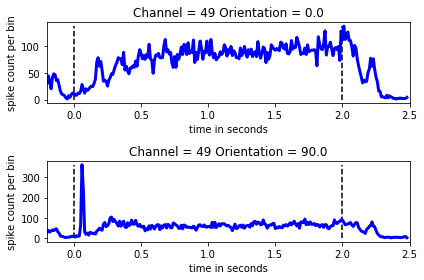

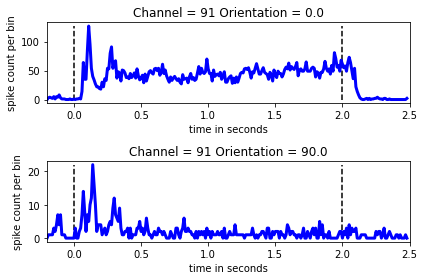

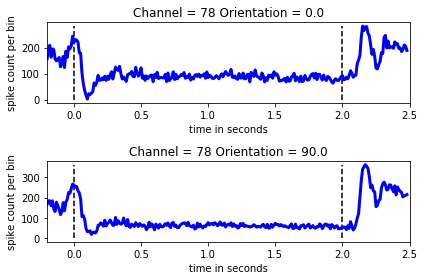

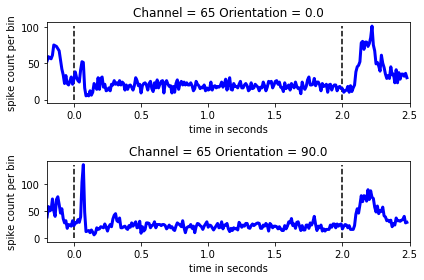

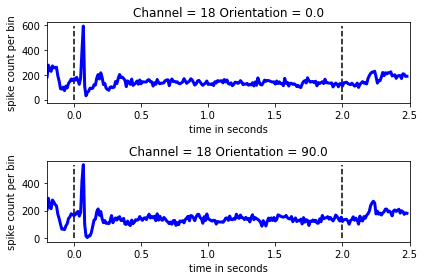

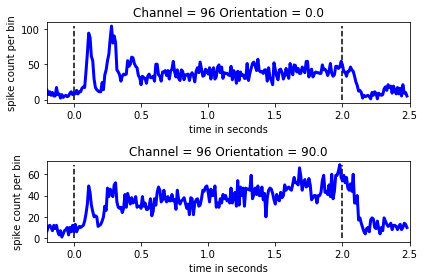

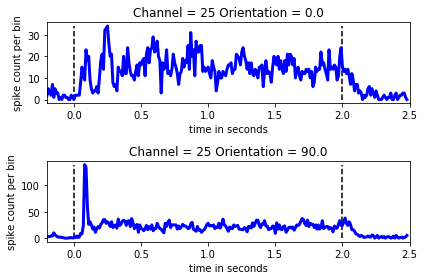

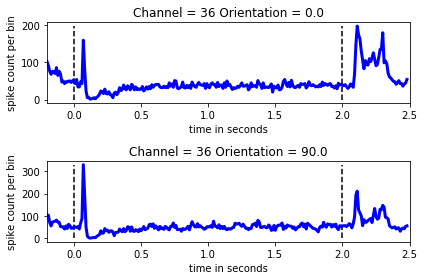

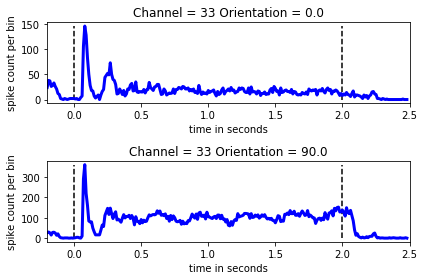

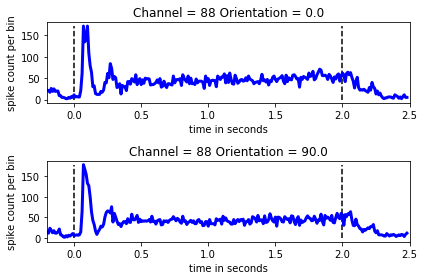

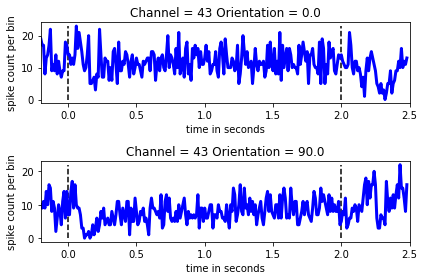

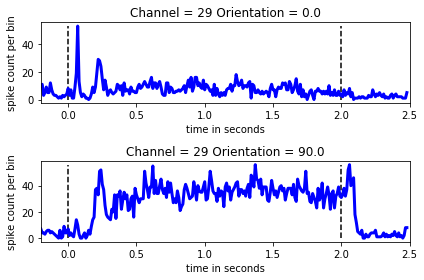

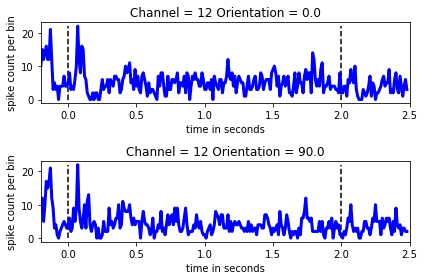

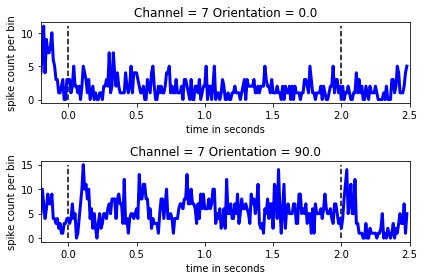

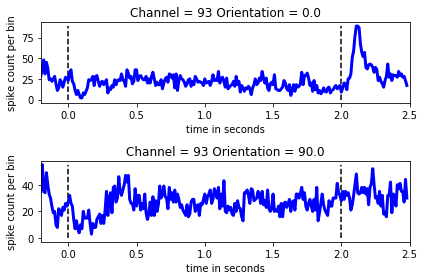

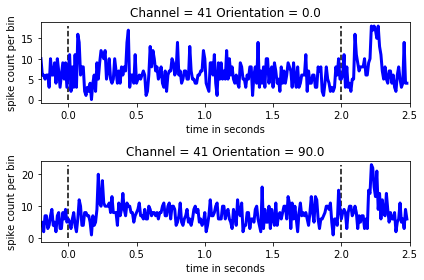

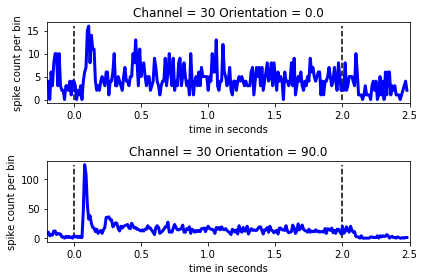

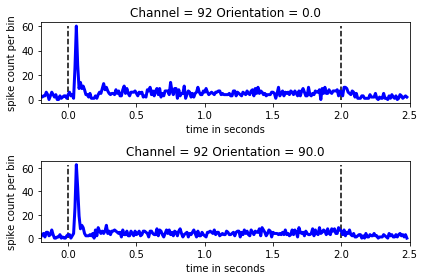

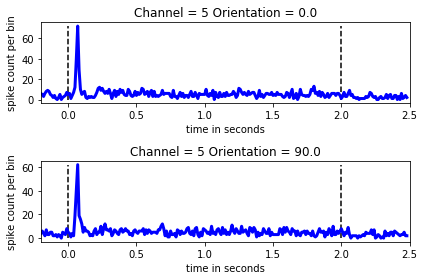

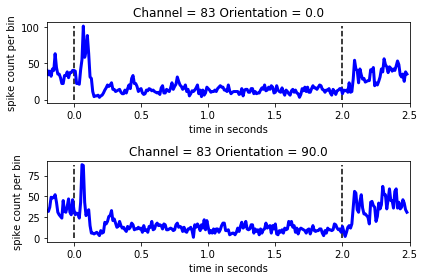

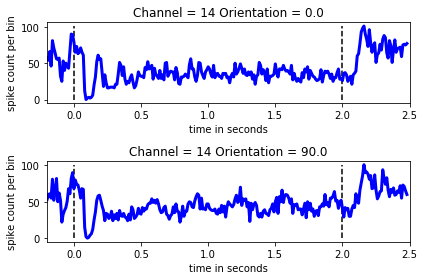

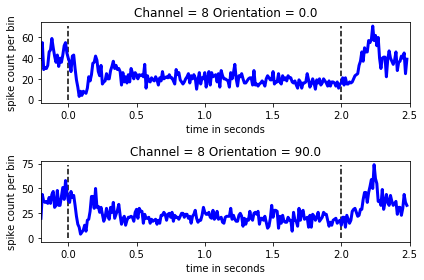

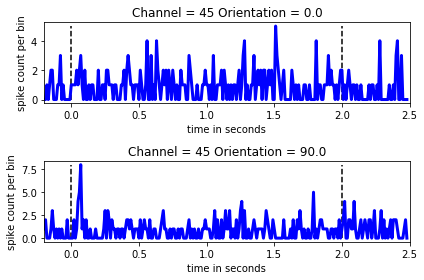

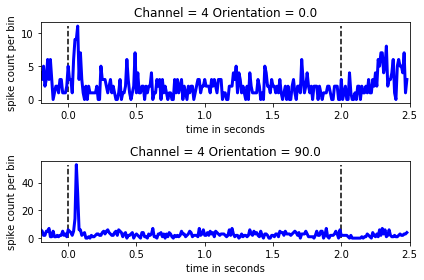

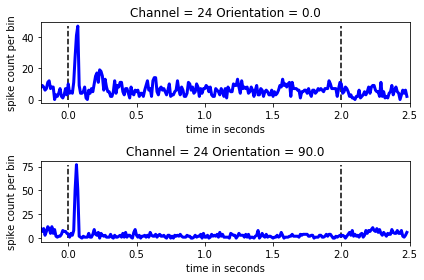

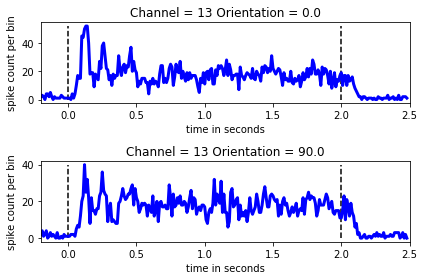

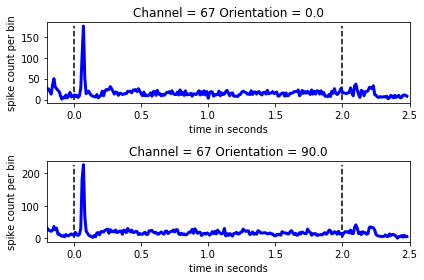

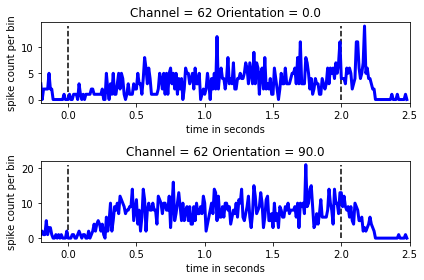

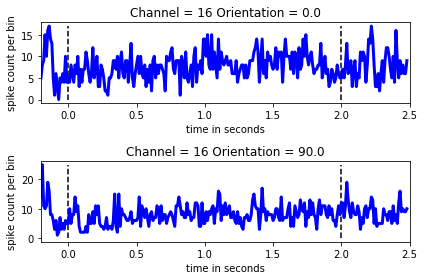

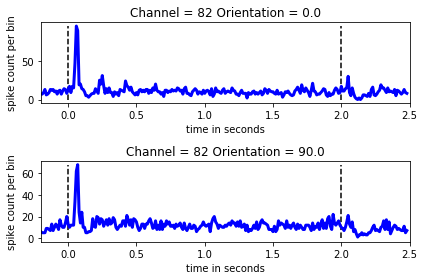

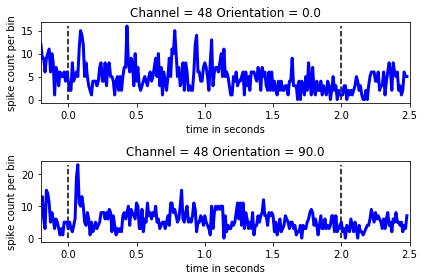

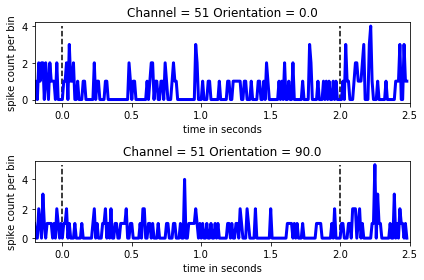

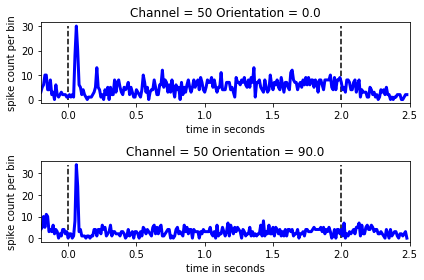

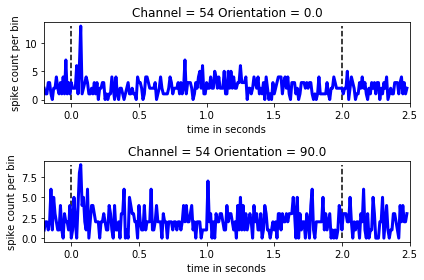

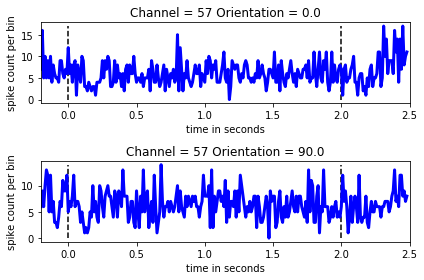

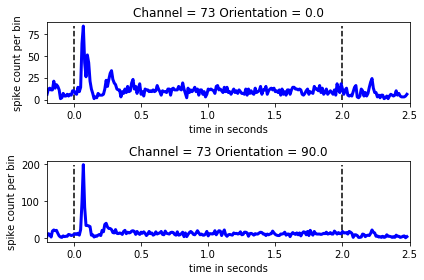

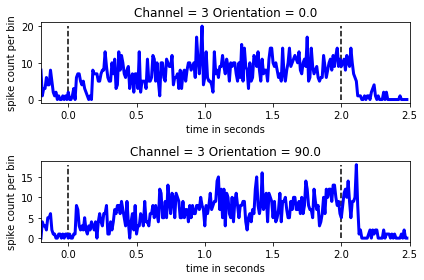

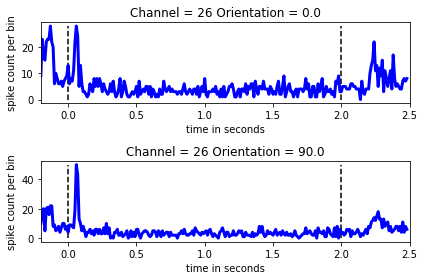

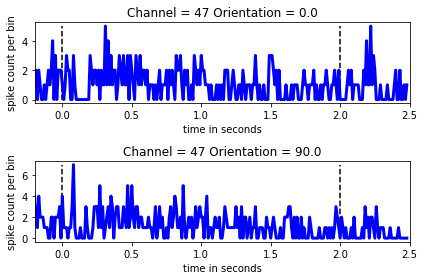

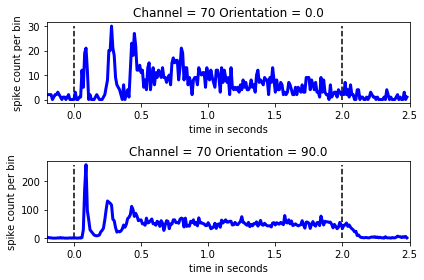

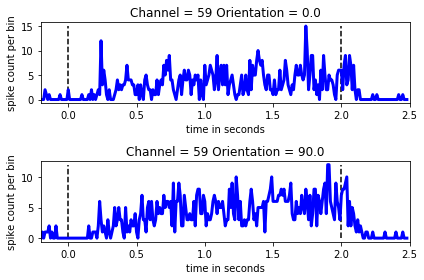

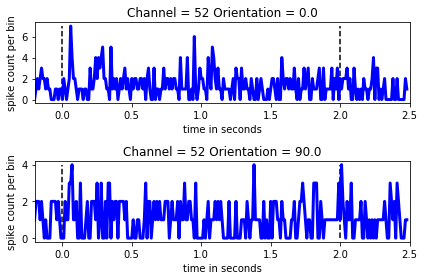

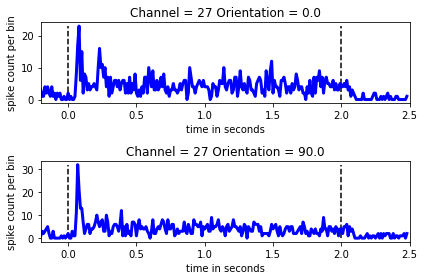

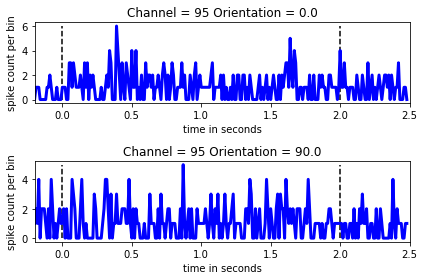

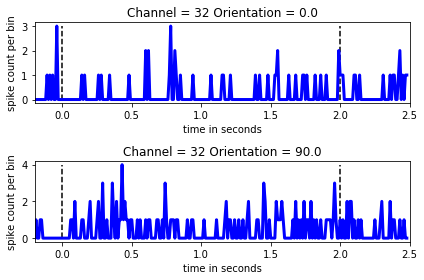

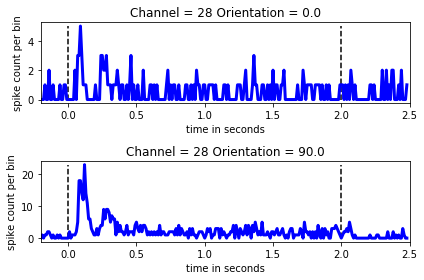

In [14]:
for unitkey in PSTHs.keys():
    fig = plt.figure(facecolor = 'w')
    for iter_n, angle in enumerate(ori):
        ax = fig.add_subplot(2,1,iter_n+1)
        ax.plot(timeBase[:-1],PSTHs[unitkey][angle],lw=3,color='b')
        ax.set_xlim([-.2,2.5])
        ax.vlines(gratingOn,0,max(PSTHs[unitkey][angle]),color='k',linestyle='--')
        ax.vlines(gratingOff,0,max(PSTHs[unitkey][angle]),color='k',linestyle='--')
        ax.set_ylabel('spike count per bin')
        ax.set_xlabel('time in seconds')
        ax.set_title('Channel = '+str(int(unitkey))+' Orientation = '+str(angle))
    plt.tight_layout()

In [62]:
one_to_96 = list(range(1, 97, 1))
deadchannels = []
for channel in one_to_96:
    if channel not in list(PSTHs.keys()):
        # print(channel)
        deadchannels.append(channel)
        # find dead channel

In [64]:
live_PSTHs = PSTHs
[live_PSTHs.pop(dead, None) for dead in deadchannels]
num_chann_left = len(live_PSTHs)

In [66]:
rSC = np.zeros(shape=(len(live_PSTHs),len(live_PSTHs),len(ori))) 
for rowind,rowkey in enumerate(live_PSTHs.keys()):
    for colind,colkey in enumerate(live_PSTHs.keys()):
        for oind,angle in enumerate(ori): #4
            rSC[rowind,colind,oind],dummy =sc.pearsonr(live_PSTHs[rowkey][angle], live_PSTHs[colkey][angle]) #3
globalMean=np.mean(rSC) #7

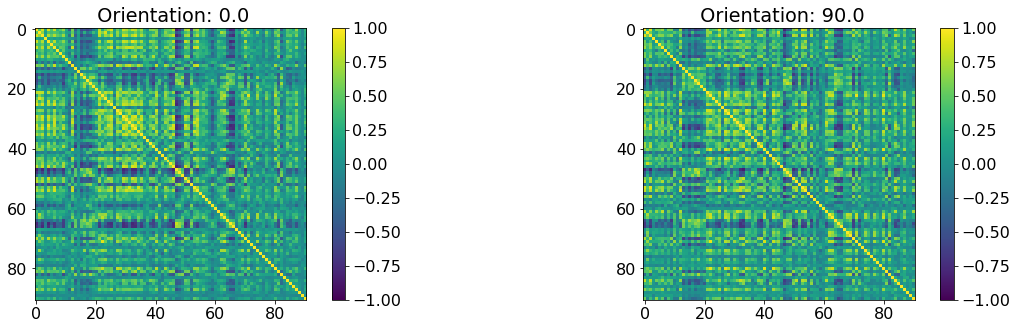

In [72]:
fig=plt.figure(figsize=(20,5)) #1
for orind,angle in enumerate(ori): #9
    ax=fig.add_subplot(1,2,orind+1) #2
    plt.imshow(rSC[:,:,orind],clim=(-1,1)) #3
    plt.colorbar() #6
    plt.title(' Orientation: '+str(angle)) #7
    matplotlib.rcParams.update({'font.size': 16}) #8

In [141]:
kernel = np.ones(3) 
convS = np.convolve(PSTHs[6][90],kernel) / len(kernel)


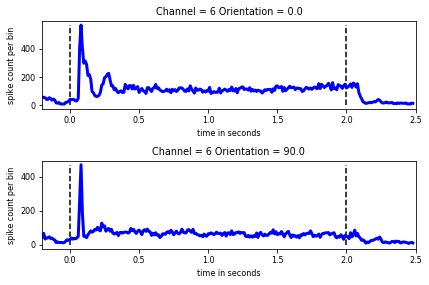

In [128]:
unitkey = 6
matplotlib.rcParams.update({'font.size': 8})
fig = plt.figure(facecolor = 'w')
for iter_n, angle in enumerate(ori):
    ax = fig.add_subplot(2,1,iter_n+1)
    ax.plot(timeBase[:-1],PSTHs[unitkey][angle],lw=3,color='b')
    ax.set_xlim([-.2,2.5])
    ax.vlines(gratingOn,0,max(PSTHs[unitkey][angle]),color='k',linestyle='--')
    ax.vlines(gratingOff,0,max(PSTHs[unitkey][angle]),color='k',linestyle='--')
    ax.set_ylabel('spike count per bin')
    ax.set_xlabel('time in seconds')
    ax.set_title('Channel = '+str(int(unitkey))+' Orientation = '+str(angle))
plt.tight_layout()

In [142]:
print(len(convS))
print(len(PSTHs[6][90]))

271
269


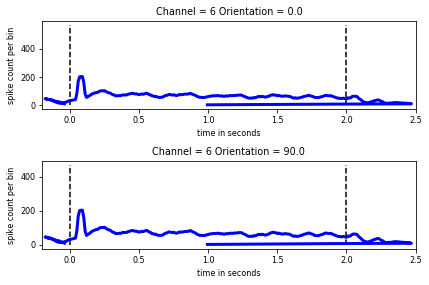

In [132]:
unitkey = 6
matplotlib.rcParams.update({'font.size': 8})
fig = plt.figure(facecolor = 'w')
for iter_n, angle in enumerate(ori):
    ax = fig.add_subplot(2,1,iter_n+1)
    ax.plot(convT[:-1],convS,lw=3,color='b')
    ax.set_xlim([-.2,2.5])
    ax.vlines(gratingOn,0,max(PSTHs[unitkey][angle]),color='k',linestyle='--')
    ax.vlines(gratingOff,0,max(PSTHs[unitkey][angle]),color='k',linestyle='--')
    ax.set_ylabel('spike count per bin')
    ax.set_xlabel('time in seconds')
    ax.set_title('Channel = '+str(int(unitkey))+' Orientation = '+str(angle))
plt.tight_layout()

In [139]:
test_list = [1,2,3,4,5,2,1,3,0]

In [143]:
np.convolve(test_list, kernel)

array([ 1.,  3.,  6.,  9., 12., 11.,  8.,  6.,  4.,  3.,  0.])

In [133]:
print(convT)
print(timeBase)

[-4.00000000e-02 -7.80000000e-02 -1.14000000e-01 -1.48000000e-01
 -1.80000000e-01 -1.70000000e-01 -1.60000000e-01 -1.50000000e-01
 -1.40000000e-01 -1.30000000e-01 -1.20000000e-01 -1.10000000e-01
 -1.00000000e-01 -9.00000000e-02 -8.00000000e-02 -7.00000000e-02
 -6.00000000e-02 -5.00000000e-02 -4.00000000e-02 -3.00000000e-02
 -2.00000000e-02 -1.00000000e-02  1.66533454e-16  1.00000000e-02
  2.00000000e-02  3.00000000e-02  4.00000000e-02  5.00000000e-02
  6.00000000e-02  7.00000000e-02  8.00000000e-02  9.00000000e-02
  1.00000000e-01  1.10000000e-01  1.20000000e-01  1.30000000e-01
  1.40000000e-01  1.50000000e-01  1.60000000e-01  1.70000000e-01
  1.80000000e-01  1.90000000e-01  2.00000000e-01  2.10000000e-01
  2.20000000e-01  2.30000000e-01  2.40000000e-01  2.50000000e-01
  2.60000000e-01  2.70000000e-01  2.80000000e-01  2.90000000e-01
  3.00000000e-01  3.10000000e-01  3.20000000e-01  3.30000000e-01
  3.40000000e-01  3.50000000e-01  3.60000000e-01  3.70000000e-01
  3.80000000e-01  3.90000